# 09. Pytorch Model Deployment

What is model deploiment?

Machine learning model deployment is the act of making your machine learning model(s) available to someone or someting else


## 0. Get setup



In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    !pip install torchvision==0.15.2 # 0.16.0 has error to download models
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 137.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 117.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 116.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

torch version: 2.1.0+cu118
torchvision version: 0.15.2+cu117


In [1]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4036, done.
remote: Counting objects: 100% (1224/1224), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 4036 (delta 1068), reused 1078 (delta 996), pack-reused 2812
Receiving objects: 100% (4036/4036), 651.02 MiB | 36.56 MiB/s, done.
Resolving deltas: 100% (2361/2361), done.
Updating files: 100% (248/248), done.


In [11]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

## 1. Getting Data

The dataset we're going to use for deploying a FoodVision Mini model is...

Pizza, steak, sushi 20% dataset(pizza, steak, sushi classes From Food1001, random 20% of sample)

In [12]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] Did not find data/pizza_steak_sushi_20_percent directory, creating one...
[INFO] Downloading pizza_steak_sushi_20_percent.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip...
[INFO] Unzipping pizza_steak_sushi_20_percent.zip data...


PosixPath('data/pizza_steak_sushi_20_percent')

In [13]:
# Setup training and test paths
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

## 2. FoodVision Mini model deployment experiment outline

### 3 questions

1. What is my most ideal machine learning model deployment scenario?
2. Where is my model going to go?
3. How is my model going function?

**FoodVision Mini ideal use case:** A model that performs well and fast

1. Performs well: 95%+ accuracy
2. Fasl: as close to real-time(or faster) as possible (30 FPS or 30ms latency)

  - Latency = time for prediction to take place

To try  and achieve these goals, we're going to build two model experiments

1. EffNetB2 feature extractor (just like in 07. Pytorch experiment tracking)
2. ViT feature extractir (just like in 08.Pytorch Paper replicating)



##3. Creating an EffNetB2 feature extractor

Feature extractor = a term for a transfer learning model that has its best layers frozen and output layers (or head layers) cutomized to a certain problem.

EffNetB2 pretrained model in pytorch https://pytorch.org/vision/stable/models/generated/torchvision.models.efficientnet_b2.html#efficientnet-b2

In [14]:
# 1. Setup pretrained EffNetB2 weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights) # could also use weights="DEFAULT"

# 4. Freeze the base layers in the model (this will freeze all layers to begin with)
for param in effnetb2.parameters():
    param.requires_grad = False

In [15]:
# Check out EffNetB2 classifier head
effnetb2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

In [16]:
# 5. Update the classifier head
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True), # keep dropout layer same
    nn.Linear(in_features=1408, # keep in_features same
              out_features=3)) # change out_features to suit our number of classes

In [17]:
from torchinfo import summary

# Print EffNetB2 model summary (uncomment for full output)
summary(effnetb2,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

### 3.1 Creating a function to make an EffNetB2 feature extractor

In [18]:
def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    #torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

In [19]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

In [20]:
# Print EffNetB2 model summary (uncomment for full output)
summary(effnetb2,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

### 3.2 Create DataLoaders for EffnetB2

In [21]:
# Setup DataLoaders
from going_modular.going_modular import data_setup

train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32,
                                                                                                 num_workers=1)

In [22]:
len(train_dataloader_effnetb2), len(test_dataloader_effnetb2), class_names

(15, 5, ['pizza', 'steak', 'sushi'])

### 3.3 Training EffNetB2 feature extractor

In [23]:
from going_modular.going_modular import engine

# Create loss function
loss_fn_effenetb2 = torch.nn.CrossEntropyLoss()

# Create the otimizer
optimizer_effnetb2 = torch.optim.Adam(effnetb2.parameters(), lr=1e-3)

# Epochs
EPOCHS = 10

# Train
effnetb2_results = engine.train(model=effnetb2,
                       train_dataloader=train_dataloader_effnetb2,
                       test_dataloader=test_dataloader_effnetb2,
                       loss_fn=loss_fn_effenetb2,
                       optimizer=optimizer_effnetb2,
                       epochs=EPOCHS,
                       device=device)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9370 | train_acc: 0.6292 | test_loss: 0.7352 | test_acc: 0.8926
Epoch: 2 | train_loss: 0.6942 | train_acc: 0.8625 | test_loss: 0.5825 | test_acc: 0.9290
Epoch: 3 | train_loss: 0.5358 | train_acc: 0.8854 | test_loss: 0.4780 | test_acc: 0.9318
Epoch: 4 | train_loss: 0.4769 | train_acc: 0.8771 | test_loss: 0.4252 | test_acc: 0.9477
Epoch: 5 | train_loss: 0.4914 | train_acc: 0.8375 | test_loss: 0.3691 | test_acc: 0.9437
Epoch: 6 | train_loss: 0.3712 | train_acc: 0.9333 | test_loss: 0.3753 | test_acc: 0.9568
Epoch: 7 | train_loss: 0.3564 | train_acc: 0.9208 | test_loss: 0.3151 | test_acc: 0.9443
Epoch: 8 | train_loss: 0.3965 | train_acc: 0.8604 | test_loss: 0.2990 | test_acc: 0.9688
Epoch: 9 | train_loss: 0.3691 | train_acc: 0.9083 | test_loss: 0.2964 | test_acc: 0.9443
Epoch: 10 | train_loss: 0.3014 | train_acc: 0.9167 | test_loss: 0.3126 | test_acc: 0.9568


### 3.4 Inspecting EffnetB2 loss

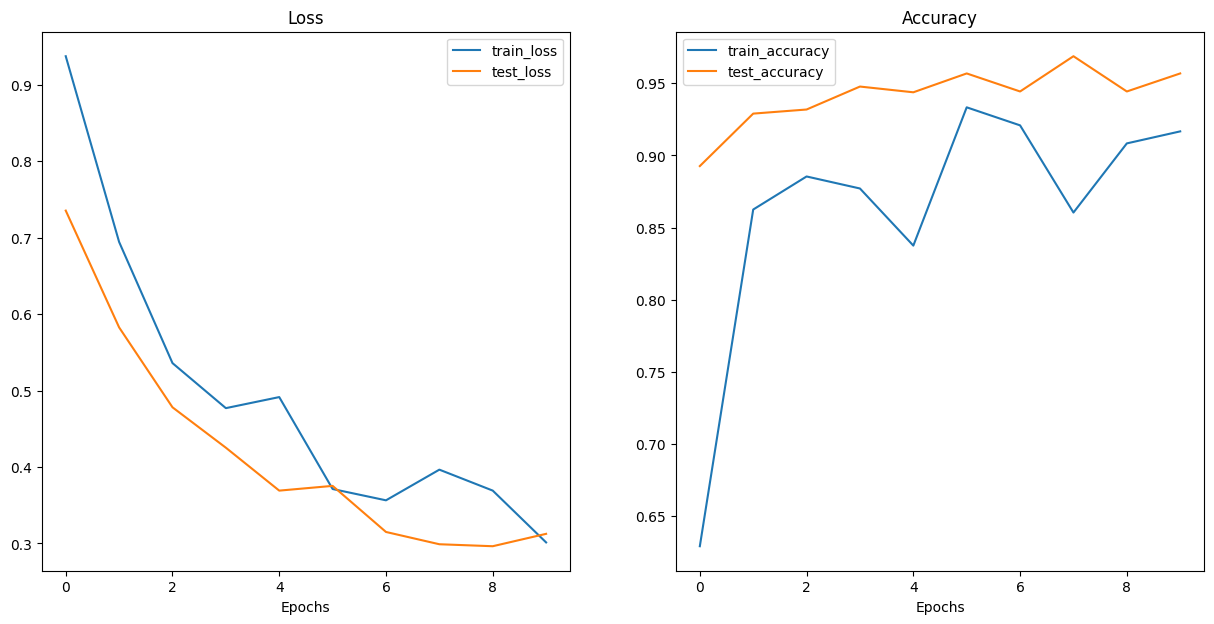

In [24]:
# Plot loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2_results)

## 3.5 Saving Effnet feature extractor

In [25]:
from going_modular.going_modular import utils

# Save the model
utils.save_model(model=effnetb2,
                 target_dir='models',
                 model_name='09_pretrained_effnetb2_feature_extrator_pizza_steak_sushi_20_percent.pth')

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extrator_pizza_steak_sushi_20_percent.pth


### 3.6 Inspect the size of our EffNetB2 feature extractor

Why would it be important to consider the size of a saved model?

If we're deploying our model to be used on a mobile app/website, there may limited compute resources

So if our model file is too large, we may not be able to store/run it on our target device

In [26]:
from pathlib import Path

# Get the model size in bytes and convert to megabytes
pretrained_effnetb2_model_size = Path('models/09_pretrained_effnetb2_feature_extrator_pizza_steak_sushi_20_percent.pth').stat().st_size / (1024 * 1024)
print(f'Pretrained feature extractor model size: {round(pretrained_effnetb2_model_size, 2)} MB')

Pretrained feature extractor model size: 29.86 MB


### 3.7 Collecting EffNetB2 feature extractor stats

In [27]:
# Count number of parameters in EffNetB2
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

In [28]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {
    "test_loss": effnetb2_results["test_loss"][-1],
    "test_acc": effnetb2_results["test_acc"][-1],
    "number_of_pameters": effnetb2_total_params,
    'model_size(MB)': pretrained_effnetb2_model_size
    }

effnetb2_stats

{'test_loss': 0.31262846291065216,
 'test_acc': 0.9568181818181818,
 'number_of_pameters': 7705221,
 'model_size(MB)': 29.85662269592285}

## 4. Create a ViT feature extractor

We're up to our second modelling experiment, repeating the steps for EffNetB2, but this time with a ViT feature extractor

In [29]:
def create_vit_model(num_classes:int=3,
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model.
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """

    # 1. Setup pretrained ViT weights
    vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

    # 2. Get vit transforms
    vit_transforms = vit_weights.transforms()

    # 3. Setup pretrained model
    model = torchvision.models.vit_b_16(weights=vit_weights) # could also use weights="DEFAULT"

    # 4. Freeze the base layers in the model (this will freeze all layers to begin with)
    for param in model.parameters():
      param.requires_grad = False

    # 5. Update the head of ViT
    model.heads = nn.Sequential(
    nn.Linear(in_features=768, # keep in_features same
              out_features=num_classes)
    ) # change out_features to suit our number of classes

    return model, vit_transforms

In [30]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)
vit_transforms

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 82.1MB/s]


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [31]:
# Print EffNetB2 model summary (uncomment for full output)
summary(vit,
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

### 4.1 Create DataLoaders for ViT feature extractor

In [32]:
# Setup DataLoaders
from going_modular.going_modular import data_setup

train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=vit_transforms,
                                                                                                 batch_size=32)

### 4.2 Training ViT feature extractor


In [33]:
from going_modular.going_modular import engine

# Create loss function
loss_fn_bit = torch.nn.CrossEntropyLoss()

# Create the otimizer
optimizer_vit = torch.optim.Adam(vit.parameters(), lr=1e-3)

# Epochs
EPOCHS = 10

# Train
vit_results = engine.train(model=vit,
                       train_dataloader=train_dataloader_vit,
                       test_dataloader=test_dataloader_vit,
                       loss_fn=loss_fn_bit,
                       optimizer=optimizer_vit,
                       epochs=EPOCHS,
                       device=device)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6428 | train_acc: 0.8063 | test_loss: 0.2391 | test_acc: 0.9812
Epoch: 2 | train_loss: 0.2177 | train_acc: 0.9458 | test_loss: 0.1176 | test_acc: 0.9875
Epoch: 3 | train_loss: 0.1529 | train_acc: 0.9625 | test_loss: 0.0901 | test_acc: 0.9812
Epoch: 4 | train_loss: 0.1187 | train_acc: 0.9667 | test_loss: 0.0800 | test_acc: 0.9812
Epoch: 5 | train_loss: 0.1024 | train_acc: 0.9688 | test_loss: 0.0703 | test_acc: 0.9875
Epoch: 6 | train_loss: 0.1261 | train_acc: 0.9437 | test_loss: 0.0656 | test_acc: 0.9812
Epoch: 7 | train_loss: 0.0793 | train_acc: 0.9875 | test_loss: 0.0664 | test_acc: 0.9812
Epoch: 8 | train_loss: 0.0705 | train_acc: 0.9875 | test_loss: 0.0596 | test_acc: 0.9875
Epoch: 9 | train_loss: 0.0639 | train_acc: 0.9875 | test_loss: 0.0566 | test_acc: 0.9875
Epoch: 10 | train_loss: 0.0541 | train_acc: 0.9896 | test_loss: 0.0533 | test_acc: 0.9875


### 4.3 Training ViT feature extractor

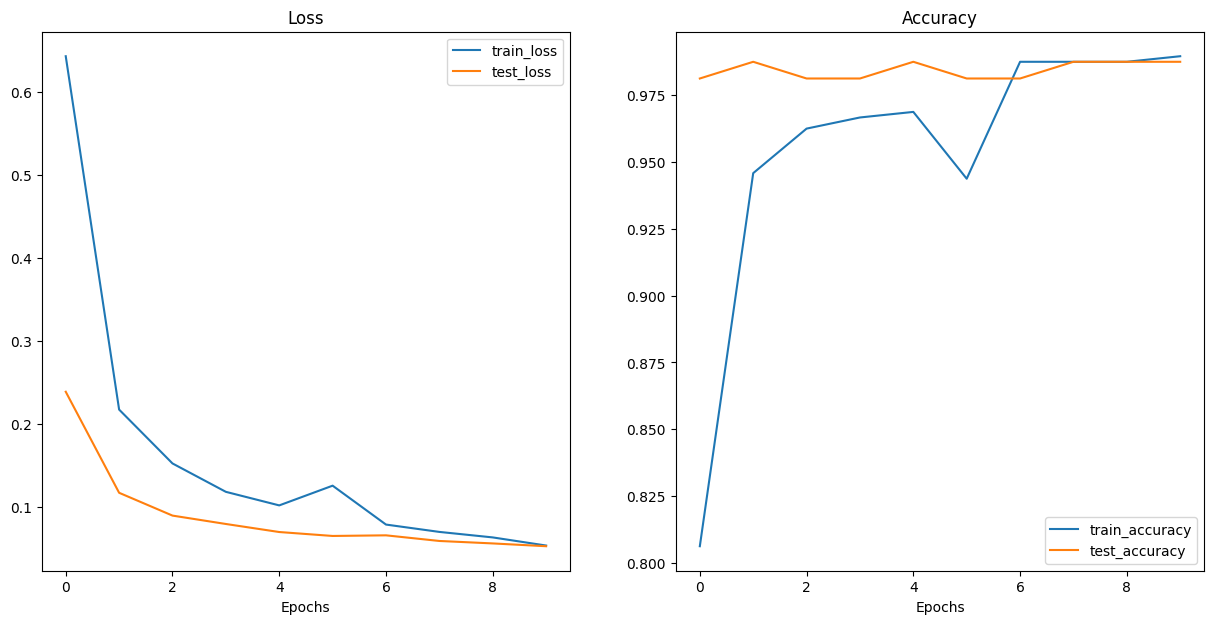

In [34]:
# Plot loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(vit_results)

### 4.4 Saving ViT feature extractor

In [35]:
from going_modular.going_modular import utils

# Save the model
utils.save_model(model=vit,
                 target_dir='models',
                 model_name='09_pretrained_vit_feature_extrator_pizza_steak_sushi_20_percent.pth')

[INFO] Saving model to: models/09_pretrained_vit_feature_extrator_pizza_steak_sushi_20_percent.pth


### 4.5 Cheking the size of ViT feature extractor

In [36]:
from pathlib import Path

# Get the model size in bytes and convert to megabytes
pretrained_vit_model_size = Path('models/09_pretrained_vit_feature_extrator_pizza_steak_sushi_20_percent.pth').stat().st_size / (1024 * 1024)
print(f'Pretrained feature extractor model size: {round(pretrained_vit_model_size, 2)} MB')

Pretrained feature extractor model size: 327.37 MB


### 4.6

In [37]:
# Count number of parameters in ViT
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

85800963

In [38]:
# Create a ViT statistics dictionary
vit_stats = {
    "test_loss": vit_results["test_loss"][-1],
    "test_acc": vit_results["test_acc"][-1],
    "number_of_pameters": vit_total_params,
    'model_size(MB)': pretrained_vit_model_size
    }

vit_stats

{'test_loss': 0.05326932058669627,
 'test_acc': 0.9875,
 'number_of_pameters': 85800963,
 'model_size(MB)': 327.36880683898926}

## 5. Making predictions with our trained models and timing them

Our goal:

1. Performs well(95%+ test accucary)
2. Fast (30+FPS)

To test criteria two
1. Loop through test image
2. Time how losng each moldel a prediction on the image

Let's work towards making a function called `pred_and_store()` to do so.

First we'll need list of test image paths

In [39]:
# Get all test data paths
test_data_paths = list(Path(test_dir).glob('*/*.jpg'))
test_data_paths

[PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/289822.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/1655387.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/831681.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/1972463.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/670345.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/40947.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/48208.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3497585.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2353677.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/1482489.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3138001.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/3063435.jpg'),

### 5.1 Creating a function to make across the test dataset

Steps to create `pred_and_store()`:

1. Create a function that makes a list of paths and a trained PyTorch model and a series of transforms a list of target class names and target dice.
2. Create an empty list(can return a full list of all prediction later).
3. Loop through the target input paths (the rest of the steps will take place inside the loop)
4. Create an empty  dictionary for each sample (prediction statistics will go in here).
5. Get the sample path and ground truth class name (we can do this by infering the class from the path).
6. Start the prediction timer using Python's `timeit.default_timer()`.
7. Open the image using `PIL.Image.open(path)`.
8. Transform the image so it's capable of being used with the target model as well as add a batch dimension and send the image to the target device.
9. Prepare the model for inference by sending it to the target device and turning on `eval()` mode.
10. Turn on `torch.inference_mode()` and pass the target transformed image to the model and calculate the prediction probability using torch.softmax() and the target label using torch.argmax().
11. Add the prediction probability and prediction class to the prediction dictionary created in step 4. Also make sure the prediction probability is on the CPU so it can be used with non-GPU libraries such as NumPy and pandas for later inspection.
12. End the prediction timer started in step 6 and add the time to the prediction dictionary created in step 4.
13. See if the predicted class matches the ground truth class from step 5 and add the result to the prediction dictionary created in step 4.
14. Append the updated prediction dictionary to the empty list of predictions created in step 2.
15. Return the list of prediction dictionaries.



In [40]:
import torch
import torchvision
import PIL
from torchvision import transforms
from typing import List, Dict
from pathlib import Path
from timeit import default_timer as timer
from tqdm.auto import tqdm
# 1. Create function pred_and_store
def pred_and_store(paths: List[Path],
                   model: torch.nn.Module,
                   transforms: transforms.Compose,
                   class_names: List[str],
                   device: torch.device) -> List[Dict]:
  # 2. Create empty list
  predictions = []

  # 3. Loop through paths
  for path in tqdm(paths):
    # 4. Empty dict
    pred_stats = {}

    # 5. Get sample path and ground truth
    sample_path = str(path)
    pred_stats['image_path'] = sample_path
    #sample_class = sample_path.split('/')[-2]
    sample_class = path.parent.stem
    pred_stats['class_name'] = sample_class

    # 6. Start timing
    start_time = timer()

    # 7. Open image with PIL
    image = PIL.Image.open(sample_path)

    # 8. Transforme image, send to right device and add batch dimesion
    transformed_image = transforms(image)
    transformed_image = transformed_image.unsqueeze(0).to(device)

    # 9. Prepare the model to inference and send to target device
    model.eval()
    model.to(device)

    # 10. Pass image through the model in inference mode
    with torch.inference_mode():
      y_logits = model(transformed_image)
      y_probs = torch.softmax(y_logits, dim=1) # Turn logits into predictions probabilities
      label = torch.argmax(y_probs, dim=1) # Turn predictions probabilities into prediction label
      label = class_names[label.cpu()] # hardcode prediciton class to be on CPU(Python variables live o CPU)

      # 11. Add pred prob and pred class to dict
      #print(y_probs)
      #print(y_probs.unsqueeze(0))
      pred_stats['pred_prob'] = round(y_probs.unsqueeze(0).max().cpu().item(), 4)
      pred_stats['pred_class'] = label

    # 12. End timer
    end_time = timer()
    pred_stats['time_for_pred'] = round(end_time-start_time, 4)

    # 15. Is it a correct prediction
    pred_stats['correct'] = sample_class == label

    # 14. Append
    predictions.append(pred_stats)

  # 15. Return result list
  return predictions


### 5.2 Making and timing predictions with EffNetB2

Let's test our `pred_and_store()` function.

Two things to note:
1. Device - we're going to hardcode our predictions to happen on CPU (because you won't always be sure of having a GPU when you deploy your model).
2. Transforms - we want to make sure each of the models are predictig on images tha have been prepared with aproprieate transforms(e.g EffNetB2 with `effnetb2_transforms`)

In [41]:
# Make predictions test dataset with EffNetB2
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
               model=effnetb2,
               class_names=class_names,
               transforms=effnetb2_transforms,
               device='cpu')  # hardcode predictions to happen on CPU

  0%|          | 0/150 [00:00<?, ?it/s]

In [42]:
effnetb2_test_pred_dicts[:2]

[{'image_path': 'data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg',
  'class_name': 'steak',
  'pred_prob': 0.9358,
  'pred_class': 'steak',
  'time_for_pred': 0.1234,
  'correct': True},
 {'image_path': 'data/pizza_steak_sushi_20_percent/test/steak/289822.jpg',
  'class_name': 'steak',
  'pred_prob': 0.9683,
  'pred_class': 'steak',
  'time_for_pred': 0.0887,
  'correct': True}]

In [43]:
# Turn the test_pred_dict into a DataFrame
import pandas as pd
effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.9358,steak,0.1234,True
1,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9683,steak,0.0887,True
2,data/pizza_steak_sushi_20_percent/test/steak/1...,steak,0.7375,steak,0.0943,True
3,data/pizza_steak_sushi_20_percent/test/steak/8...,steak,0.9349,steak,0.0971,True
4,data/pizza_steak_sushi_20_percent/test/steak/1...,steak,0.7938,steak,0.0832,True


In [44]:
# Check number of correct predictions
effnetb2_test_pred_df.correct.value_counts()

True     144
False      6
Name: correct, dtype: int64

In [45]:
# Find the average time per prediction
effnetb2_average_time_pred = round(effnetb2_test_pred_df.time_for_pred.mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_pred}")

EffNetB2 average time per prediction: 0.0885


**Note:** Prediction times will(much like training time) depending on the hardware you're using... so generally the faster your compute(e.g. CPU or GPU), the faster the predictions will happen.

In [46]:
# Add  time per pred to EffNetB2 stats dictionary
effnetb2_stats["timer_per_pred_cpu"] = effnetb2_average_time_pred
effnetb2_stats

{'test_loss': 0.31262846291065216,
 'test_acc': 0.9568181818181818,
 'number_of_pameters': 7705221,
 'model_size(MB)': 29.85662269592285,
 'timer_per_pred_cpu': 0.0885}

### 5.3 Making and timing predictions with Vit


In [47]:
# Make predictions test dataset with ViT feature extractor on test dataset
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
               model=vit,
               class_names=class_names,
               transforms=vit_transforms,
               device='cpu')  # hardcode predictions to happen on CPU



  0%|          | 0/150 [00:00<?, ?it/s]

In [48]:
vit_test_pred_dicts[:2]

[{'image_path': 'data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg',
  'class_name': 'steak',
  'pred_prob': 0.9926,
  'pred_class': 'steak',
  'time_for_pred': 0.5004,
  'correct': True},
 {'image_path': 'data/pizza_steak_sushi_20_percent/test/steak/289822.jpg',
  'class_name': 'steak',
  'pred_prob': 0.9973,
  'pred_class': 'steak',
  'time_for_pred': 0.4854,
  'correct': True}]

In [49]:
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/3...,steak,0.9926,steak,0.5004,True
1,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9973,steak,0.4854,True
2,data/pizza_steak_sushi_20_percent/test/steak/1...,steak,0.9261,steak,0.5017,True
3,data/pizza_steak_sushi_20_percent/test/steak/8...,steak,0.9905,steak,0.5082,True
4,data/pizza_steak_sushi_20_percent/test/steak/1...,steak,0.9978,steak,0.4936,True


In [50]:
vit_test_pred_df.correct.value_counts()

True     148
False      2
Name: correct, dtype: int64

In [51]:
# Find the average time per prediction
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"ViT average time per prediction: {vit_average_time_per_pred}")

ViT average time per prediction: 0.5094


In [52]:
# Add average time per prediction to ViT stats
vit_stats['timer_per_pred_cpu'] = vit_average_time_per_pred
vit_stats

{'test_loss': 0.05326932058669627,
 'test_acc': 0.9875,
 'number_of_pameters': 85800963,
 'model_size(MB)': 327.36880683898926,
 'timer_per_pred_cpu': 0.5094}

## 6. Comparing model results, prediction times and size

In [53]:
# Tuurn stat dictionaries into DataFrame
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add comlumn for model names
df['model'] = ['EffNetB2', 'ViT']

# Converts accuracy to percentages
df["test_acc"] = round(df['test_acc']*  100, 2)

df

,test_loss,test_acc,number_of_pameters,model_size(MB),timer_per_pred_cpu,model
0,0.312628,95.68,7705221,29.856623,0.0885,EffNetB2
1,0.053269,98.75,85800963,327.368807,0.5094,ViT


Which model is better?

- `test_loss` (lower is better) - ViT
- `test_acc`  (higher is better) - ViT
- `number_of_parameters` (generally lower is better*) - EffNetB2 (if a model has more parameters, it generally takes longer to compute)
  * *Sometimes models with higher parameters can still perfom fast
* `model_size (MB)` - EffNetB2(for our case of deploying to a mobile device, generally lower is better
* `time_per_pred_cpu` (lower is better, will be highly dependent on the hardware you're running on) - EffNetB2

Both models fail to achieve our goal of 30+FPS...however we could always just try and use EffNetB2 and see how it goes.

In [54]:
# Compare ViT to EffNetB2 across different characteristics
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]), # divide ViT statistics by EffNetB2 statistics
             columns=["ViT to EffNetB2 ratios"]).T

,test_loss,test_acc,number_of_pameters,model_size(MB),timer_per_pred_cpu
ViT to EffNetB2 ratios,0.170392,1.032086,11.135432,10.964697,5.755932


### 6.1 Visualizing the speed vs performance tradeoff

So we've compare our EffNetB2 and ViT extractor feature models, now let's visualize the comparison with speed vs performance plot.

We can do so with matplotlib:

1. Create a scatter plot from the comparasion DataFrame to compare EffNetB2 and ViT across test accuracy and prediction time.
2. Add titles and labels to make our plot nice.
3. Annotate the samples on the scatter plot so we know what's going on.
4. Create a lenged based on the model sizes(`model_size(MB)`)

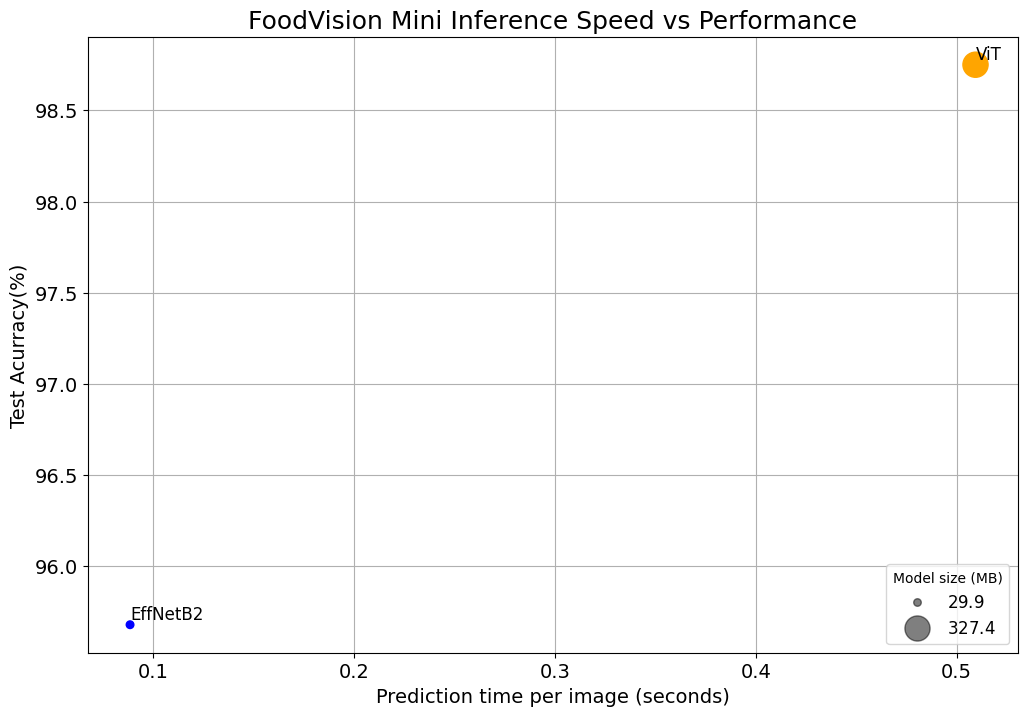

In [55]:
# 1. Create a plot from model comparasion DataFrame
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df,
                     x='timer_per_pred_cpu',
                     y='test_acc',
                     c=['blue', 'orange'],
                     s='model_size(MB)')

# 2. Add titles and labels to make our plot good
ax.set_title("FoodVision Mini Inference Speed vs Performance", fontsize=18)
ax.set_xlabel("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test Acurracy(%)", fontsize=14)
ax.tick_params(axis="both", labelsize=14)
ax.grid(True)


# 3. Annotate the samples on the scatter plot so we know what's going on
for index, row in df.iterrows():
  ax.annotate(text=row['model'],
              xy=(row['timer_per_pred_cpu']+0.00006, row['test_acc']+0.03),
              size=12)

# 4. Create a legend based on the model sizes (model_size(MB))
handles, labels = scatter.legend_elements(prop='sizes', alpha=0.5)
model_size_legend = ax.legend(handles,
                              labels,
                              loc='lower right',
                              title="Model size (MB)",
                              fontsize=12)

# 5. Saving the figure
plt.savefig("09-foodvision-mini-inference-speed-vs-performance.png")

## 7. Bringing FoodVison Mini to life by creating a Gradio demo

We've chosen to deploy EffNetB2 as it fulfils our criteria the best

What is gradio?

Gradio is the fastest way to demo your machine learning model width a friendly web interface so that anyone can use it, anywhere!

https://gradio.app/

In [56]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.2 MB

In [57]:
import gradio as gr

ImportError: ignored

In [ ]:
# Import/install Gradio
try:
    import gradio as gr
except:
    !pip -q install gradio
    import gradio as gr

print(f"Gradio version: {gr.__version__}")

### 7.1 Gradio overview

Gradio helps you create machine learning demo.

Why create a demo?

So other people can try our models and we can test them in the real-world.

Deployiment is as important as training.

The overal premise of Gradio is to map inputs -> function/model -> outputs.

### 7.2 Create a function to map our inputs and outputs

In [ ]:
# Put the model on on CPU
effnetb2 = effnetb2.to('cpu')

# Check the device
next(iter(effnetb2.parameters())).device

Let's create a function called `predict()` to go from:

```
images of food -> ML Model(EffeNetB2) -> outputs(food class label)
```

In [ ]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
  # Start a timer
  start_time = timer()

  # Transform the input image for use with EffNetB2
  img = effnetb2_transforms(img).unsqueeze(0) # unsqueeze = Add batch dimension on 0th index

  # Put model into eval mode, make prediction
  effnetb2.eval()
  with torch.inference_mode():
    # Pass tansformed image through the model and turn the prediction logits into probabilities
    pred_probs = torch.softmax(effnetb2(img), dim=1)

  # Create a  prediction label and prediction probability dictionary
  pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}


  # Calculate pred time
  end_time = timer()
  pred_time = round(end_time - start_time, 4)

  # Return pre dict and pred_time
  return pred_labels_and_probs, pred_time

In [ ]:
import random
from PIL import Image
from pathlib import Path

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]
random_image_path

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(image)
print(pred_dict)
print(pred_time)


### 7.3 Creating a list of examples

In [ ]:
# Create list of exemple inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in  random.sample(test_data_path, k=3)]
example_list

### 7.4 Building a Gradio Interface

Let's use `gr.Interface()` to go from:

```
input: image -> transoform -> predict with EffNetB2 -> output: pred, prob prob, time
```

In [ ]:
import gradio as gr

# Create title, description and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

## 8. Turning our FoodVison Mini Gradio Demo into a desployable app

Our gradio demos from Google Colab are fantastisc but they expire whitin  72 hours

To fix this, we're going to prepare our app files so we can host thme on Hugging Face Spaces: https://huggingfaze.co/docs/spaces

### 8.1 What is Hugging Face Spaces

> Hugging Face Spaces is a resource that allows you to host and share machine learning apps.

> Building a demo is one of the best ways to showcase and test what you've done.

>And Spaces allows you to do just that.

> You can think of Hugging Face as the GitHub of machine learning.

If having a good GitHub portfolio showcases your coding abilities, having a good Hugging Face portfolio can showcase your machine learning abilities.

### 8.2 Deployed Gradio app structure

Let's start to put all of our app files into a single directory

```
Colab -> folder with all Gradio files -> upload app files to Huggin Face Sapaces -> deploy
```

By the end our file structure will look loke this:

```
demos/
└── foodvision_mini/
    ├── 09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
    ├── app.py
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    │   └── example_3.jpg
    ├── model.py
    └── requirements.txt

```

### 8.3 Creating a `demos` folder to store our FoodVision Mini app files

In [ ]:
import shutil
from pathlib import Path

# Create FoodVision Mini demo path
foodvision_mini_demo_path = Path('demos/foodvision_mini')

# Remove files that might exist and create new directory
if foodvision_mini_demo_path.exist():
    shutil.rmtree(foodvisio_mini_demo_path)
    foodvision_mini_demo_path.mkdir(parents=True,
                                   exist=True)
else:
    foodvision_mini_demo_path.mkdir(parents=True,
                                   exist=True)

### 8.4 Creating a folder of examples images to use with our FooMini demo

What wewant:
 - 3 images in an `examples/` directory
 - Image should be from the test set

In [ ]:
import shutil
from pathlib import Path

# Create an example directory
foodvision_mini_example_path = foodvision_mini_demo_path / 'examples'
foodvision_mini_example_path.mkdir(parents=True, exist_ok=True)


# Collect three random test dataset image paths
foodvision_mini_examples = [Path('data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg')]

# Copy the three images to the examples directory
for example in foodvision_mini_examples:
  destination = foodvision_mini_example_path / example.name
  print(f"[INFO] Copying {example} to {destination}")
  shutil.copy2(src=example,
               dst=destination)

Let's now verify that we can get a list of lists fromour `example/` directory

In [ ]:
import os

# Get example filepaths in a list of lists
example_list = [["examples/" + example] for example in os.listdir(foodvision_mini_examples_path)]
example_list

### 8.5 Moving our trained EffNetB2 model to our FoodVision Mini demo directory

In [ ]:
import shutil

# Create a source path for our target model
effnetb2_foodvision_mini_model_path = "models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"

# Create a destination path for our target model
effnetb2_foodvision_mini_model_destination = foodvision_mini_demo_path / effnetb2_foodvision_mini_model_path.split("/")[1]

# Try to move the file
try:
    print(f"[INFO] Attempting to move {effnetb2_foodvision_mini_model_path} to {effnetb2_foodvision_mini_model_destination}")

    # Move the model
    shutil.move(src=effnetb2_foodvision_mini_model_path,
                dst=effnetb2_foodvision_mini_model_destination)

    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {effnetb2_foodvision_mini_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {effnetb2_foodvision_mini_model_destination}: {effnetb2_foodvision_mini_model_destination.exists()}")

### 8.6 turning off EffnetB2 model into a Python script(`model.py`)

We have a saved `.pth` model `state_dict` and we want to load it into a model instance

Let's move our `create_effnetb2_model()` function to a script so we can reuse it

In [ ]:
%%writefile demos/foodvision_mini/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

In [ ]:
from demos.foodvision import model

effnetb2_model, effnetb2_transforms_import = model.create_effnetb2_model()
effnetb2_model

### 8.7 Turning our FoodVision Mini Gradio app into a Python script (`app.py`)

The  `app.py`file will have four major parts:
1. Imports and class names setup
2. Model and transforms preparation
3. Predict function (`predict()`)
4. Gradio app - our Gradio interface + launch comand

In [ ]:
#%%writefile demos/foodvision_mini/app.py

### 1. Imports and class names setup ###
import gradio gr
import os
import torch
from model import create_effnetb2_model
from timeit import default_timer as timer

# Setup class names ###
class_names = ['pizza', 'steak', 'sushi']

### 2. Model and transforms preparation ###
effnetb2, effnetb2_tranforms = create_effnetb2_model(
    num_classes=2
)

# Load save weights
effnetb2.load_state_dict(torch.load(
    f="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth",
        map_location=torch.device("cpu") # load CPU, if you save the model and it's device was GPU it's maybe load on GPU
))

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    # Create examples list from "examples/" directory
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()

### 8.8 Creating a requirements file for FoodVision Mini (`requirements.txt`)

The requirements file will tell our Hugging Face Space what  software dependencies our app requires

Three main ones are:
`
* `torch==1.12.0`
* `torchvision==0.13.0`
* `gradio==3.1.4`


In [ ]:
%%writefile demos/foodvision_mini/requirements.txt
torch==2.1.0
torchvision==0.16.0
gradio==3.1.4

## 9. Deploying our FoodVision Mini app to HuggingFace Spaces

### 9.1 Downloading our FoodVision Mini apps files

There are two main options for uploading to a Hugging Face Space (also called a Hugging Face Repository, similar to a git repository):

- Uploading via the Hugging Face Web interface (easiest).
- Uploading via the command line or terminal.
>Bonus: You can also use the huggingface_hub library to interact with Hugging Face, this would be a good extension to the above two options.

Feel free to read the documentation on both options but we're going to go with option two.

Note: To host anything on Hugging Face, you will to sign up for a free Hugging Face account.


In [ ]:
!ls demos/foodvision_mini

In [ ]:
# Change into and then zip the foodvision_mini folder but exclude certain files
!cd demos/foodvision_mini && zip -r ../foodvision_mini.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Mini app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/foodvision_mini.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download(), please manually download.")

### 9.3 Uploading to Hugging Face

https://www.learnpytorch.io/09_pytorch_model_deployment/#93-uploading-to-hugging-face

In [ ]:
# IPython is a library to help make Python interactive
from IPython.display import IFrame

# Embed FoodVision Mini Gradio demo
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_mini/+", width=900, height=750)

## 10. FoodVision Big!!!

FoodVision Mini works well with 3 classes(pizza, steak and sushi)

So all of experiments is playing off

Let's step things up a notch and make FoodVision Big!!! using all of the Food101 Classes

### 10.1 Creating a model FoodVision Big

In [ ]:
# Create EffNetB2 model capable of fitting to 101 classes for Food101
effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

In [ ]:
from torchinfo import summary

# # Get a summary of EffNetB2 feature extractor for Food101 with 101 output classes (uncomment for full output)
# summary(effnetb2_food101,
#         input_size=(1, 3, 224, 224),
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

Since we're working with a larger dataset, we may want to introduce some data
augmentation techniques:

* This is because with larger datasets and larger models, overfitting becomes more of a problem
* Because we're working with a larger number of classes, let's use TrivialAugment as our data augmentation technique.

For a list of state-of-art computer vision recipes: https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [ ]:
# Create Food101 training data transforms (only perform data augmentation on the training images)
food101_train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnetb2_transforms,
])

### 10.2 Getting data for FoodVision Big

In [ ]:
from torchvision.datasets import Food101
from pathlib import Path

# Setup data directory
data_dir = Path('data')

# Get the training data(~750 x1 01 class)
dataset_train = Food101(root=str(data_dir),
                        split='train',
                        transform=food101_train_transforms,
                        download=True)

# Get the training data(~250 x1 01 class)
dataset_test = Food101(root=str(data_dir),
                       split='test',
                       transform=effnetb2_transforms,
                       download=True)

In [ ]:
# Get Food101 class names
food101_class_names = dataset_train.classes

# View the first 10
food101_class_names[:10]

### 10.3 Creating a subset of the Food101 dataset for faster experimenting

Why create a subset?

We want our first few experiments to run as quick as possible.

We know FoodVision Mini works pretty well but this is first time we've upgraded to 101 classes.

To do so, let's make a subset of 20% of the data from the Food101 dataset

Our short-term goal: to beat the original Food101 paper result of 56,40% accuracy on the test dataset.

We want to beat this result using modern deep learning techniques and only 20% of the data


In [ ]:
from torch.utils.data import random_split

def split_dataset(dataset,
                  split_size:float=0.2,
                  seed:int=42):
  """Randomly splits a given dataset into two proportions based on split_size and seed.

    Args:
        dataset (torchvision.datasets): A PyTorch Dataset, typically one from torchvision.datasets.
        split_size (float, optional): How much of the dataset should be split?
            E.g. split_size=0.2 means there will be a 20% split and an 80% split. Defaults to 0.2.
        seed (int, optional): Seed for random generator. Defaults to 42.

    Returns:
        tuple: (random_split_1, random_split_2) where random_split_1 is of size split_size*len(dataset) and
            random_split_2 is of size (1-split_size)*len(dataset).
    """

  # Create split lengths based on original dataset length
  length_1 = int(len(dataset) * split_size) # Desired length
  length_2 = len(dataset) - length_1

  # Print out info
  print(f"[INFO] Splitting dataset of length {len(dataset)} into splits of size: {length_1} ({int(split_size*100)}%), {length_2} ({int((1-split_size)*100)}%)")

  # Create splits with given random seed
  random_split_1, random_split_2 = random_split(dataset,
                                                            lengths=[length_1, length_2],
                                                             generator=torch.manual_seed(seed)) # set the random seed for reproducible splits
  return random_split_1, random_split_2


In [ ]:
# Create training 20% split of Food101
train_data_food101_20_percent, _ = split_dataset(dataset=dataset_train,
                                                 split_size=0.2)

# Create testing 20% split of Food101
test_data_food101_20_percent, _ = split_dataset(dataset=dataset_test,
                                                split_size=0.2)

len(train_data_food101_20_percent), len(test_data_food101_20_percent)

### 10.4 Turning our Food101 datasets into DataLoaders

In [ ]:
import torch
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
NUM_WORKERS = 2 if os.cpu_count() <= 4 else 4 # this value is very experimental and will depend on the hardware you have available, Google Colab generally provides 2x CPUs

# Create Food101 20 percent training DataLoader
train_dataloader_food101_20_percent = DataLoader(dataset=train_data_food101_20_percent,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

# Create Food101 20 percent testing DataLoader
test_dataloader_food101_20_percent = DataLoader(dataset=test_data_food101_20_percent,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)



### 10.5 Training FoodVision Big!!!

Things for training
* 5 epochs
* optimizer: `torch.optim.Adam(lr=1e-3)`
* Loss function: `torch.nn.CrossEntropyLoss(label_smoothing=0.1)`

Why use label smoothing?

Label smoothing helps to prevent overfitting (it's a regularization technique).

Without label smoothing and 5 classes:

```
[0, 0, 0.99, 0.01, 0]
```

Whit label smoothing and 5 classes:

```
[0.01, 0.01, 0.96, 0.01, 0.01]
```

> **Note:** Depeding on your hardware, running the flowing cell may take 15-20 minutes(takes about 17 minutes on a NVIDIA Test P100 GPU).

In [ ]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=effnetb2_food101.parameters(),
                             lr=1e-3)

# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1) # throw in a little label smoothing because so many classes

# Want to beat original Food101 paper with 20% of data, need 56.4%+ acc on test dataset
set_seeds()
effnetb2_food101_results = engine.train(model=effnetb2_food101,
                                        train_dataloader=train_dataloader_food101_20_percent,
                                        test_dataloader=test_dataloader_food101_20_percent,
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        epochs=5,
                                        device=device)

We've just done something in ~18 minutes that wasn't possible 10 years ago...

### 10.6 Inspecting loss curves of FoofVision Big model


In [ ]:
plot_loss_curves(effnetb2_food101_results)

### 10.7 Saving and loading FoodVision Big

In [ ]:
from going_modular.going_modular import utils

# Create a model path
effnetb2_food101_model_path = "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"

# Save FoodVision Big model
utils.save_model(model=effnetb2_food101,
                 target_dir="models",
                 model_name=effnetb2_food101_model_path)

In [ ]:
# Create Food101 compatible EffNetB2 instance
loaded_effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

# Load the saved model's state_dict()
loaded_effnetb2_food101.load_state_dict(torch.load("models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"))

### 10.8 Checking FoodVision Big model size

In [ ]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_food101_model_size = Path("models", effnetb2_food101_model_path).stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained EffNetB2 feature extractor Food101 model size: {pretrained_effnetb2_food101_model_size} MB")

## 11. Turning our FoodVision Big model into a deployable app

Why deploy a model?

Deploying a model allow you to see how your model goes in real-world(the ultiate test)

Let's create an outline for our FoodVision Big app:

```
demos/
  foodvision_big/
    09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth
    app.py
    class_names.txt
    examples/
      example_1.jpg
    model.py
    requirements.txt
```

In [ ]:
from pathlib import Path

# Create FoodVision Big demo path
foodvision_big_demo_path = Path("demos/foodvision_big/")

# Make FoodVision Big demo directory
foodvision_big_demo_path.mkdir(parents=True, exist_ok=True)

# Make FoodVision Big demo examples directory
(foodvision_big_demo_path / "examples").mkdir(parents=True, exist_ok=True)

### 11.1 Downloading an example image and moving it to the examples directory

In [ ]:
# Download and move an example image
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg
!mv 04-pizza-data.jepg demos/foodvsion_bit/examples/04-pizza-data.jpg

# Move trained model to FoodVision Big demo folder (will error if model is already moved)
!mv models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth demos/foodvision_big

### 11.2 Saving Food101 class names to file (`class_names.txt`)

Let's save all of the Food101 class names to a .txt file so we can import and use them in our app.

In [1]:
# Check out the 10 Food101 class names
food101_class_names[:10]

NameError: ignored

In [ ]:
# Create path to Food101 class names
foodvision_big_class_names_path = foodvision_big_demo_path / "class_names.txt"

# Write Food101 class names list to file
with open(foodvision_big_class_names_path, "w") as f:
    print(f"[INFO] Saving Food101 class names to {foodvision_big_class_names_path}")
    f.write("\n".join(food101_class_names)) # leave a new line between each class

In [ ]:
# Open Food101 class names file and read each line into a list
with open(foodvision_big_class_names_path, "r") as f:
    food101_class_names_loaded = [food.strip() for food in  f.readlines()]

# View the first 5 class names loaded back in
food101_class_names_loaded[:5]

### 11.3 Turning our FoodVision Big model into a Python script (`model.py`)

In [ ]:
%%writefile demos/foodvision_big/model.py
import torch
import torchvision

from torch import nn


def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head.
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model.
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )

    return model, transforms

### 11.4 Turning our FoodVision Big Gradio app into a Python script (app.py)

This will again mostly be the same as the FoodVision Mini app.py script except we'll change:

1. **Imports and class names setup** - The class_names variable will be a list for all of the Food101 classes rather than pizza, steak, sushi. We can access these via demos/foodvision_big/class_names.txt.
2. **Model and transforms preparation** - The model will have num_classes=101 rather than num_classes=3. We'll also be sure to load the weights from "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth" (our FoodVision Big model path).
3. **Predict function** - This will stay the same as FoodVision Mini's app.py.
4. **Gradio app** - The Gradio interace will have different title, description and article parameters to reflect the details of FoodVision Big.


In [ ]:
%%writefile demos/foodvision_big/app.py
### 1. Imports and class names setup ###
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
with open("class_names.txt", "r") as f: # reading them in from class_names.txt
    class_names = [food_name.strip() for food_name in  f.readlines()]

### 2. Model and transforms preparation ###

# Create model
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=101, # could also use len(class_names)
)

# Load saved weights
effnetb2.load_state_dict(
    torch.load(
        f="09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "FoodVision Big 🍔👁"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food into [101 different classes](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt)."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create Gradio interface
demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=5, label="Predictions"),
        gr.Number(label="Prediction time (s)"),
    ],
    examples=example_list,
    title=title,
    description=description,
    article=article,
)

# Launch the app!
demo.launch()

### 11.5 Creating a requirements file for FoodVision Big (`requirements.txt`)



In [ ]:
%%writefile demos/foodvision_big/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

### 11.6 Downloading our FoodVision Big app files

In [ ]:
# Zip foodvision_big folder but exclude certain files
!cd demos/foodvision_big && zip -r ../foodvision_big.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Big app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/foodvision_big.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download()")

### 11.7 Deploying our FoodVision Big app to HuggingFace Spaces

In [1]:
# IPython is a library to help work with Python iteractively
from IPython.display import IFrame

# Embed FoodVision Big Gradio demo as an iFrame
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_big/+", width=900, height=750)